Predicting MPG Using Regression

Objective: Build a regression model to predict miles per gallon (MPG) of vehicles using the Auto MPG
dataset. hƩps://archive.ics.uci.edu/dataset/9/auto+mpg.


In [13]:
#Loading libraries ,dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor  # Or use GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
           'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(url, names=columns, na_values='?', comment='\t',
                 sep=' ', skipinitialspace=True)

In [14]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


In [15]:
# descriptive statistics
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,0.0
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,NaN
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,NaN


In [16]:
df.isna().sum()              #NUll values in horsepower column - 6 and Car name -398

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
car_name,398


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      0 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 28.1 KB


In [18]:
df['car_name'].unique()

array([nan])

In [19]:
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

<ipython-input-19-2571313987>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)


In [20]:
df.shape

(398, 9)

In [21]:
df.isna().sum()   #null values got fixed in horsepower

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
car_name,398


In [22]:
df.drop('car_name', axis=1, inplace=True)

droping Car_Name from dataset

In [43]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

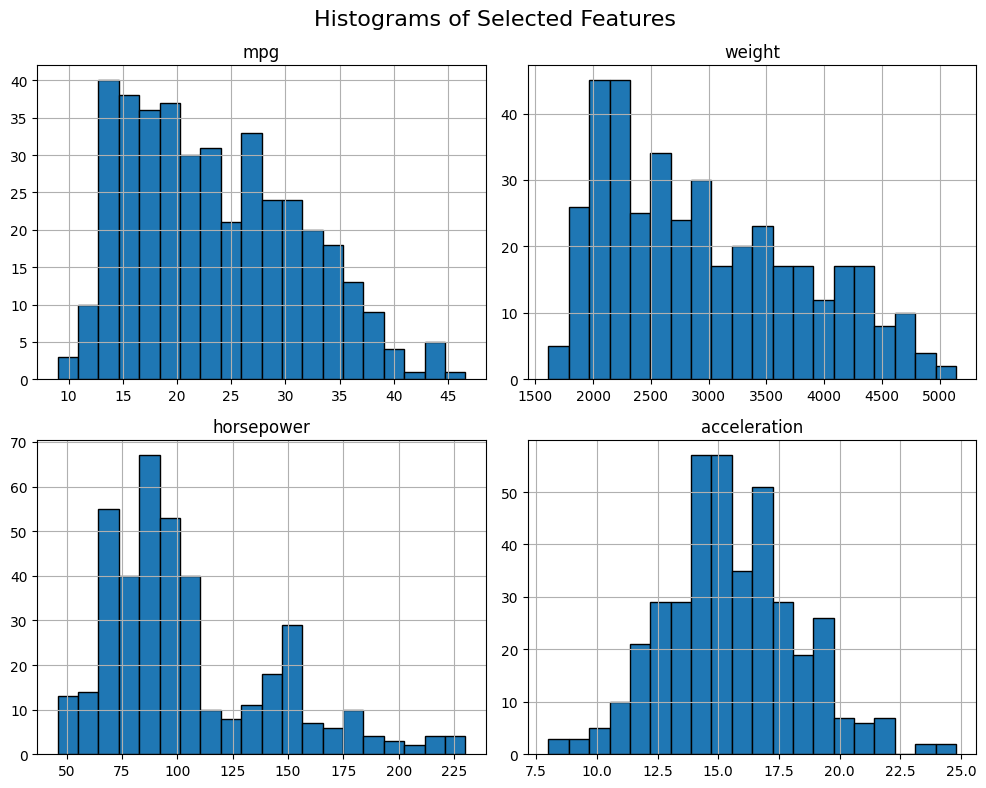

In [24]:
features = ['mpg', 'weight', 'horsepower', 'acceleration']
df[features].hist(bins=20, figsize=(10, 8), edgecolor='black')
plt.suptitle("Histograms of Selected Features", fontsize=16)
plt.tight_layout()
plt.show()

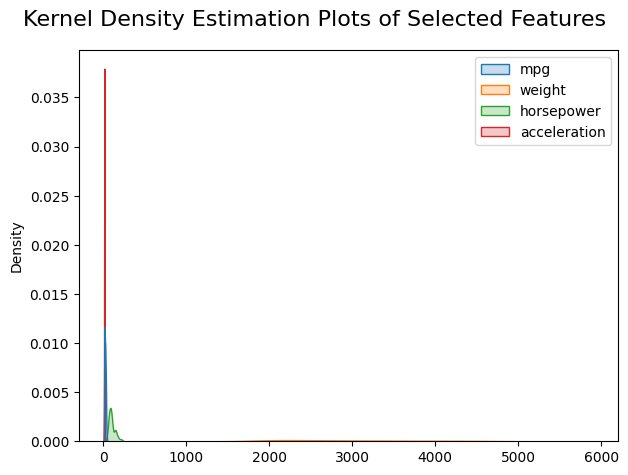

In [25]:
features = ['mpg', 'weight', 'horsepower', 'acceleration']
sns.kdeplot(df[features], fill=True, color='skyblue')
plt.suptitle("Kernel Density Estimation Plots of Selected Features", fontsize=16)
plt.tight_layout()
plt.show()

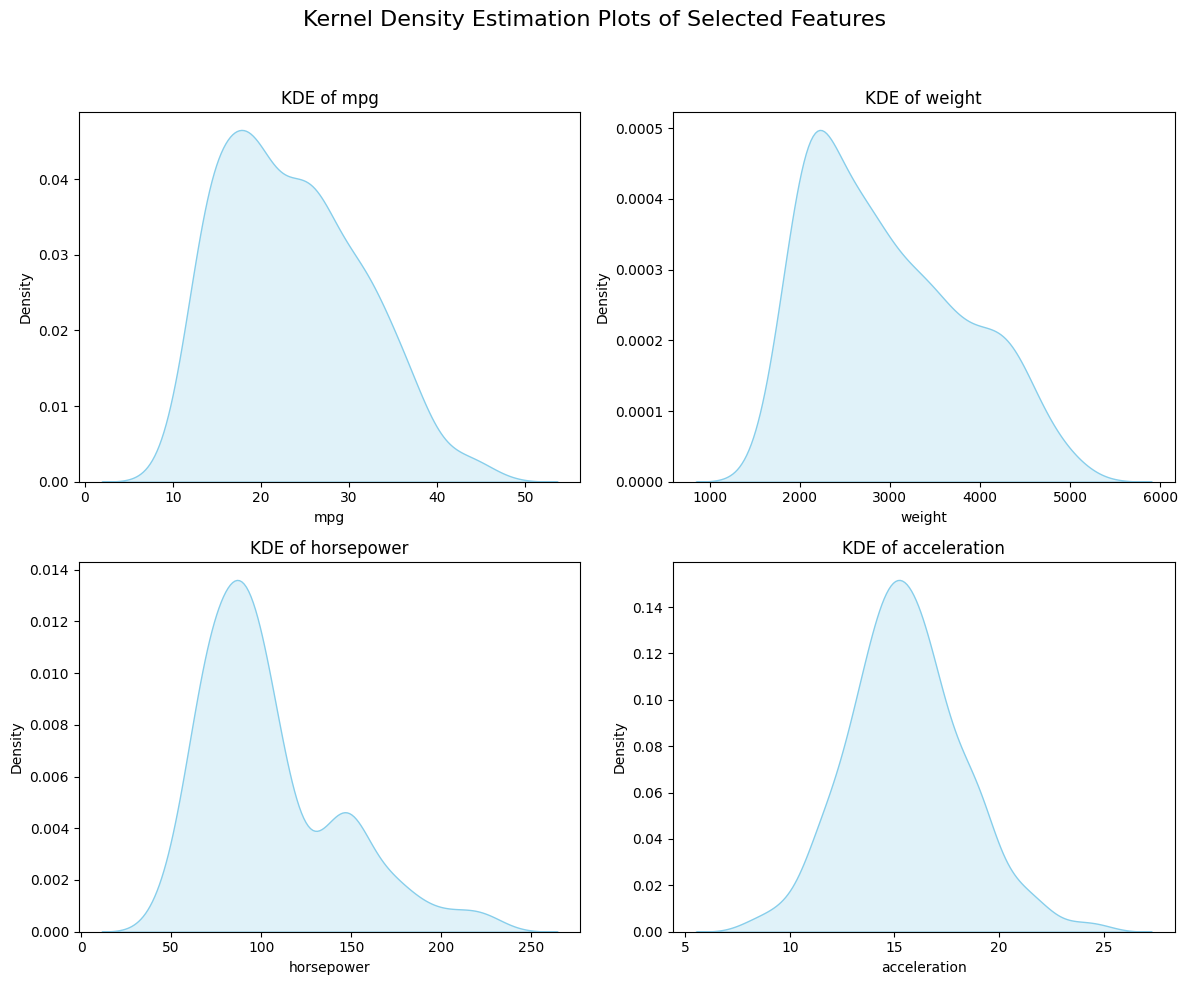

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features to plot
features = ['mpg', 'weight', 'horsepower', 'acceleration']

# Set up the 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Kernel Density Estimation Plots of Selected Features", fontsize=16)

# Loop through each feature and subplot
for ax, feature in zip(axes.flatten(), features):
    sns.kdeplot(df[feature].dropna(), fill=True, ax=ax, color='skyblue')
    ax.set_title(f"KDE of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


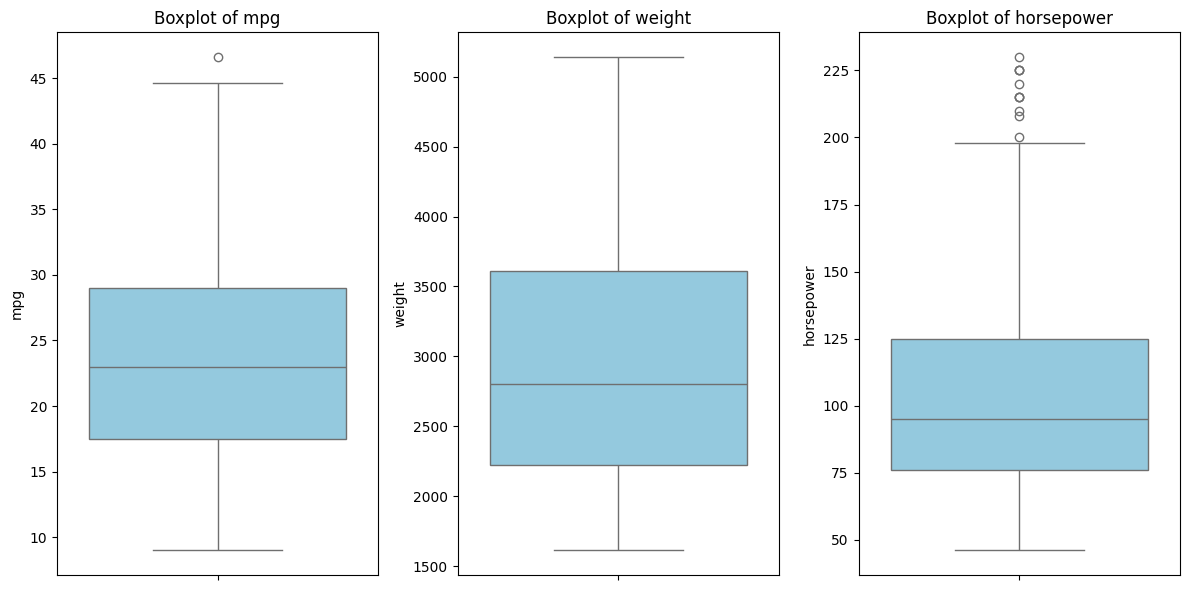

In [27]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['mpg', 'weight', 'horsepower']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()



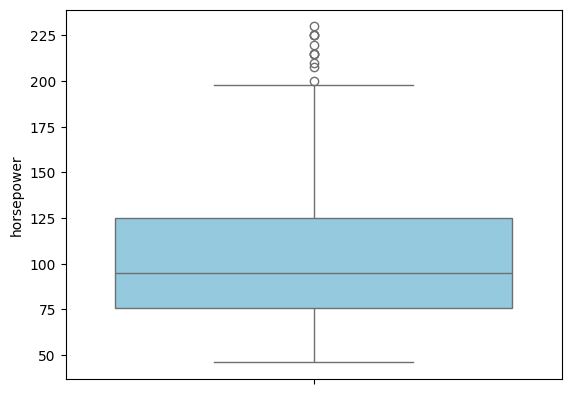

In [28]:
sns.boxplot(y=df['horsepower'], color='skyblue')
plt.show()

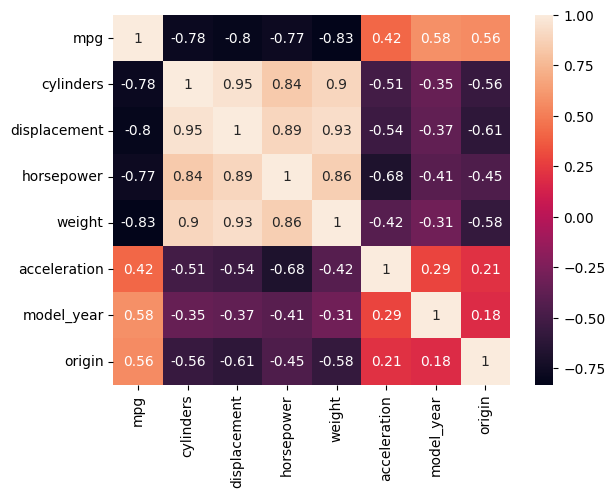

In [29]:
corr = df.corr()

sns.heatmap(corr, annot=True)
plt.show()

In [30]:
X = df.drop('mpg', axis=1)
y = df['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# 2. Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# 3. Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [32]:
models = {
    "Linear Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": round(mse, 2), "R² Score": round(r2, 3)})

results_df = pd.DataFrame(results)
print(results_df)


               Model    MSE  R² Score
0  Linear Regression   8.20     0.848
1      Decision Tree  11.18     0.792
2      Random Forest   4.60     0.915


considering cylinders,displacement,weight to df1

In [33]:
df1=df[['cylinders','displacement','weight']]

In [34]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [35]:
df1.head()

,cylinders,displacement,weight
0,8,307.0,3504.0
1,8,350.0,3693.0
2,8,318.0,3436.0
3,8,304.0,3433.0
4,8,302.0,3449.0


In [36]:
X = df1
y = df['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
y_train.head()

,mpg
3,16.0
18,27.0
376,37.0
248,36.1
177,23.0


In [38]:
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# 2. Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# 3. Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [39]:
models = {
    "Linear Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": round(mse, 2), "R² Score": round(r2, 3)})

results_df = pd.DataFrame(results)
print(results_df)

               Model    MSE  R² Score
0  Linear Regression  14.95     0.722
1      Decision Tree  34.74     0.354
2      Random Forest  14.90     0.723


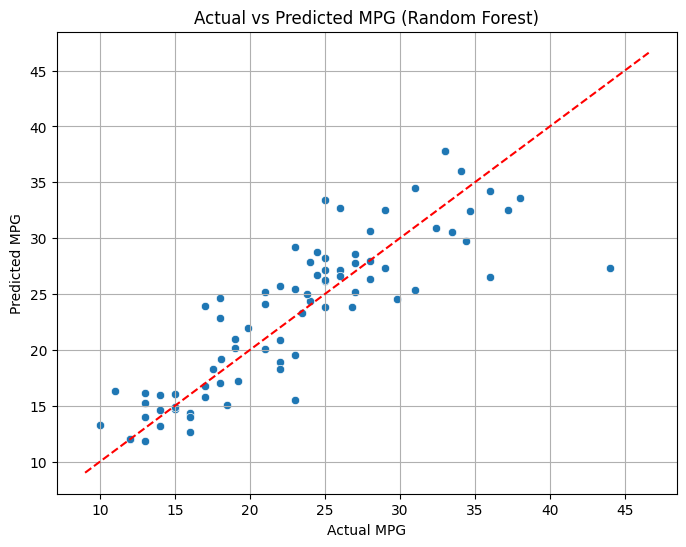

In [40]:
best_model = rf_model
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG (Random Forest)")
plt.grid(True)
plt.show()


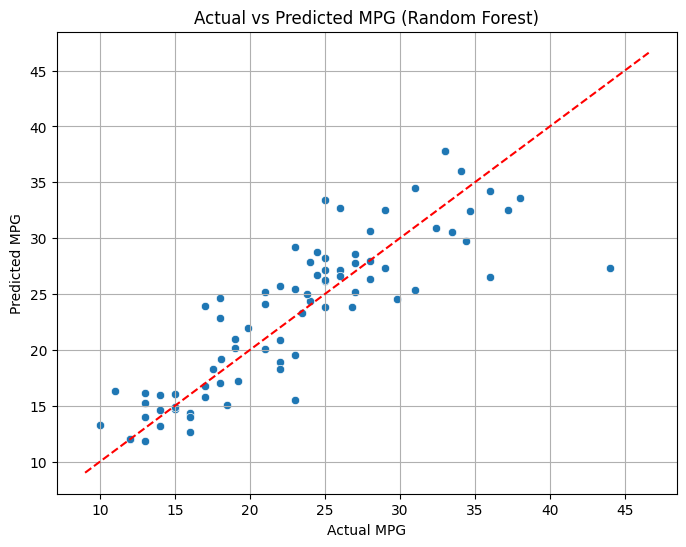

In [41]:
best_model = rf_model
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG (Random Forest)")
plt.grid(True)
plt.show()

<ipython-input-42-1403175717>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="viridis")


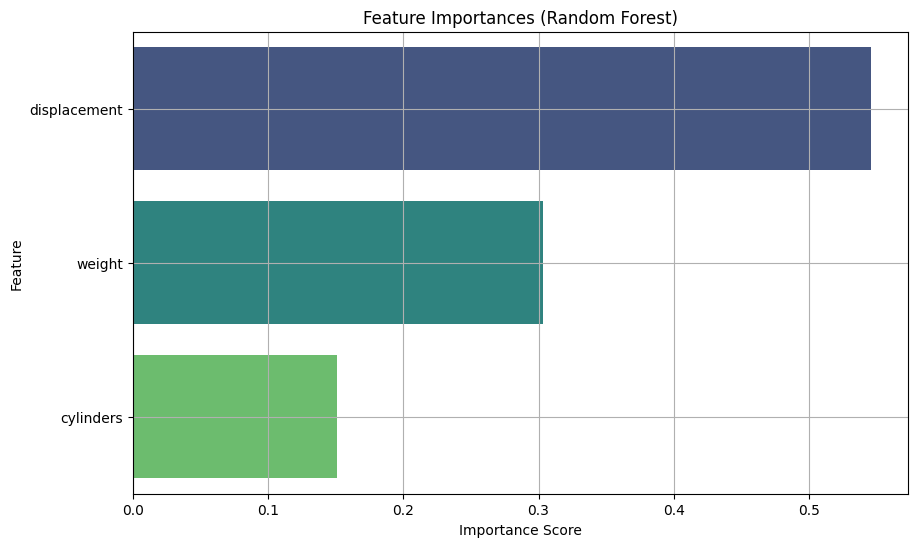

In [42]:
importances = rf_model.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="viridis")
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.show()
